# 주제 : Wisconsin breast cancer dataset로 유방암 예측
----------

## 실습 가이드
   
    1. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    2. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 위스콘신 유방암 데이터셋을 사용합니다.
    - 위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 
      악성 종양(malignant tumor)인지 양성 종양(benign tumor)인지를 예측합니다.
      양성 종양은 쉽게 전이 되지 않고 성장속도가 느린 반면에 악성 종양은 주위 조직에 빠르게 침입하여 성장하는 종양입니다.
    
    - Number of Instances: 569
    - Number of Attributes: 30 numeric, predictive attributes and the class
    - Attribute Information:
        * radius (mean of distances from center to points on the perimeter)_반지름, 반경
        * texture (standard deviation of gray-scale values)_조직, 질감
        * perimeter_둘레
        * area_면적
        * smoothness (local variation in radius lengths)_매끄러움
        * compactness (perimeter^2 / area - 1.0) (둘레^2 / 면적)- 1.0_ 조밀함, 압축 
        * concavity (severity of concave portions of the contour)_윤곽의 오목한 부분
        * concave points (number of concave portions of the contour)_윤곽의 오목한 부분의 개수
        * symmetry_대칭성
        * fractal dimension ("coastline approximation" - 1)_프렉탈 차원
     
    
    
- 데이터 출처: https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset


## 최종 목표

    - Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer

### 문제 1. 유방암 데이터셋 불러오기 


In [3]:
# 유방암 데이터셋 불러오기
data = load_breast_cancer()

- 데이터프레임 형식으로 변경하기 

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

- 타겟 변수 추가하기

In [5]:
df['target'] = data.target

- 데이터프레임 확인하기( target 컬럼확인)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 2. 데이터프레임의 각 컬럼 분석하기


In [7]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 문제 3. 데이터 시각화하기


1) 악성(malignant)과 양성(benign) 그래프 그리기 (각각 데이터 값이 얼마인지 막대그래프로 보여주기)
   - 악성(malignant) target 값 = 0
   - 양성(benign) target 값 = 1

<AxesSubplot: xlabel='target', ylabel='count'>

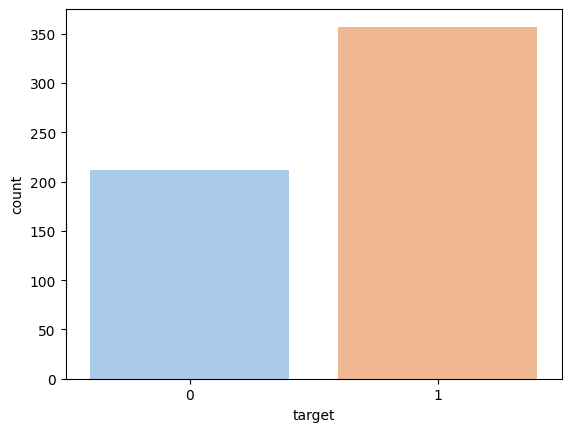

In [10]:
sns.countplot(data = df, x = 'target', palette='pastel')

In [9]:
value_counts = df['target'].value_counts()
print(value_counts)

1    357
0    212
Name: target, dtype: int64


2) 히스토그램, 막대그래프, 박스플롯, 히트맵을 사용하여 EDA 실습하기(최대한 많이) 

 예1) mean Radius,worst Radius 히스토그램 그리고 해석하기<br>
 예2) mean Radius,mean texture 다음과 같이 산점도 그려보고 상관관계 해석하기<br>
 예3) 히트맵을 이용하여 각 특성간 상관관계 시각화

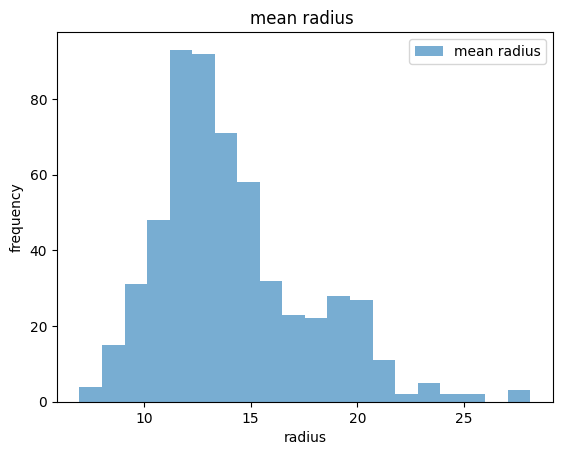

In [10]:
# mean radius: 평균 반경  
mean_radius = df['mean radius']
worst_radius = df['worst radius']

plt.hist(mean_radius, bins=20, alpha=0.6, label='mean radius')   #bins: 히스토그램 막대 개수 조정  alpha: 히스토그램 투명도 조정
# plt.hist(worst_radius, bins=10, alpha=0.3, label='worst radius')
plt.xlabel('radius')
plt.ylabel('frequency')
plt.title('mean radius ')
plt.legend()
plt.show()




In [11]:
value_counts = df['mean radius'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: mean radius, Length: 456, dtype: int64


지름이 10~15mm 일 때 빈도가 가장 높은걸로 보인다

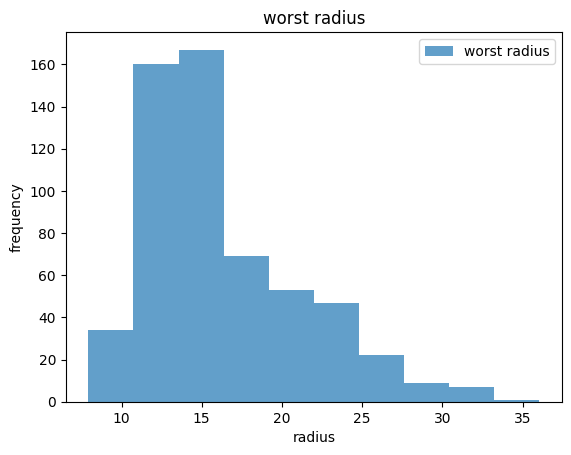

In [12]:
# mean radius: 평균 반경  
mean_radius = df['mean radius']
worst_radius = df['worst radius']

# plt.hist(mean_radius, bins=10, alpha=0.6, label='mean radius')   #bins: 히스토그램 막대 개수 조정  alpha: 히스토그램 투명도 조정
plt.hist(worst_radius, bins=10, alpha=0.7, label='worst radius', )
plt.xlabel('radius')
plt.ylabel('frequency')
plt.title('worst radius')
plt.legend()
plt.show()




#### mean Radius, mean texture 다음과 같이 산점도 그려보고 상관관계 해석

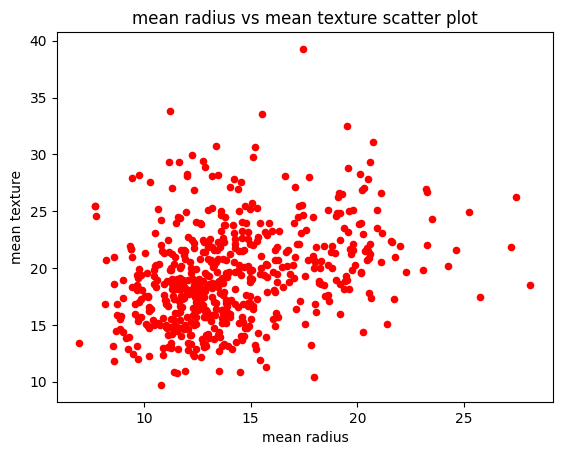

In [13]:
# texture (standard deviation of gray-scale values)_조직, 질감
x = df['mean radius']
y = df['mean texture']

df.plot.scatter(x='mean radius', y='mean texture', color='red')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('mean radius vs mean texture scatter plot')
plt.show()


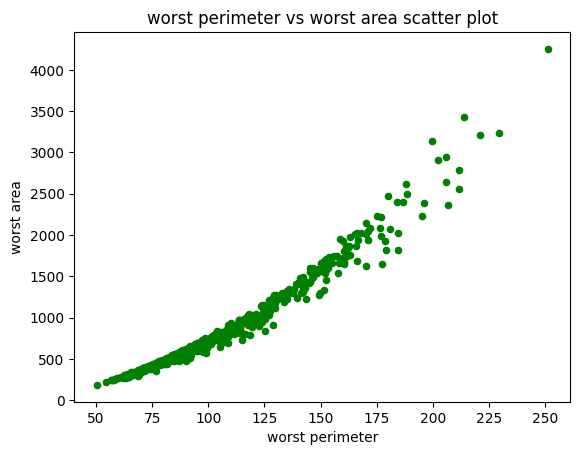

In [14]:
# worst perimeter, worst area  
# perimeter 둘레, area 면적

x = df['worst perimeter']
y = df['worst area']

df.plot.scatter(x='worst perimeter', y='worst area', color='green')
plt.xlabel('worst perimeter')
plt.ylabel('worst area')
plt.title('worst perimeter vs worst area scatter plot')
plt.show()


#### 히트맵을 이용하여 각 특성간 상관관계 시각화

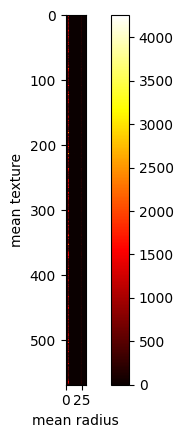

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 준비합니다.
# heatmap_data는 분석하고자 하는 데이터 프레임입니다.

# 열지도를 그립니다.
plt.imshow(df, cmap='hot', interpolation='nearest')

# 컬러 바를 추가합니다.
plt.colorbar()

# 축 레이블을 설정합니다.
plt.xlabel('mean radius')
plt.ylabel('mean texture')

# 그래프를 표시합니다.
plt.show()


In [16]:
def boxplots(df):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            sns.boxplot(df, x=df[df.columns[k]], ax=axes[i][j])
            k += 1

    plt.tight_layout()
    plt.show()

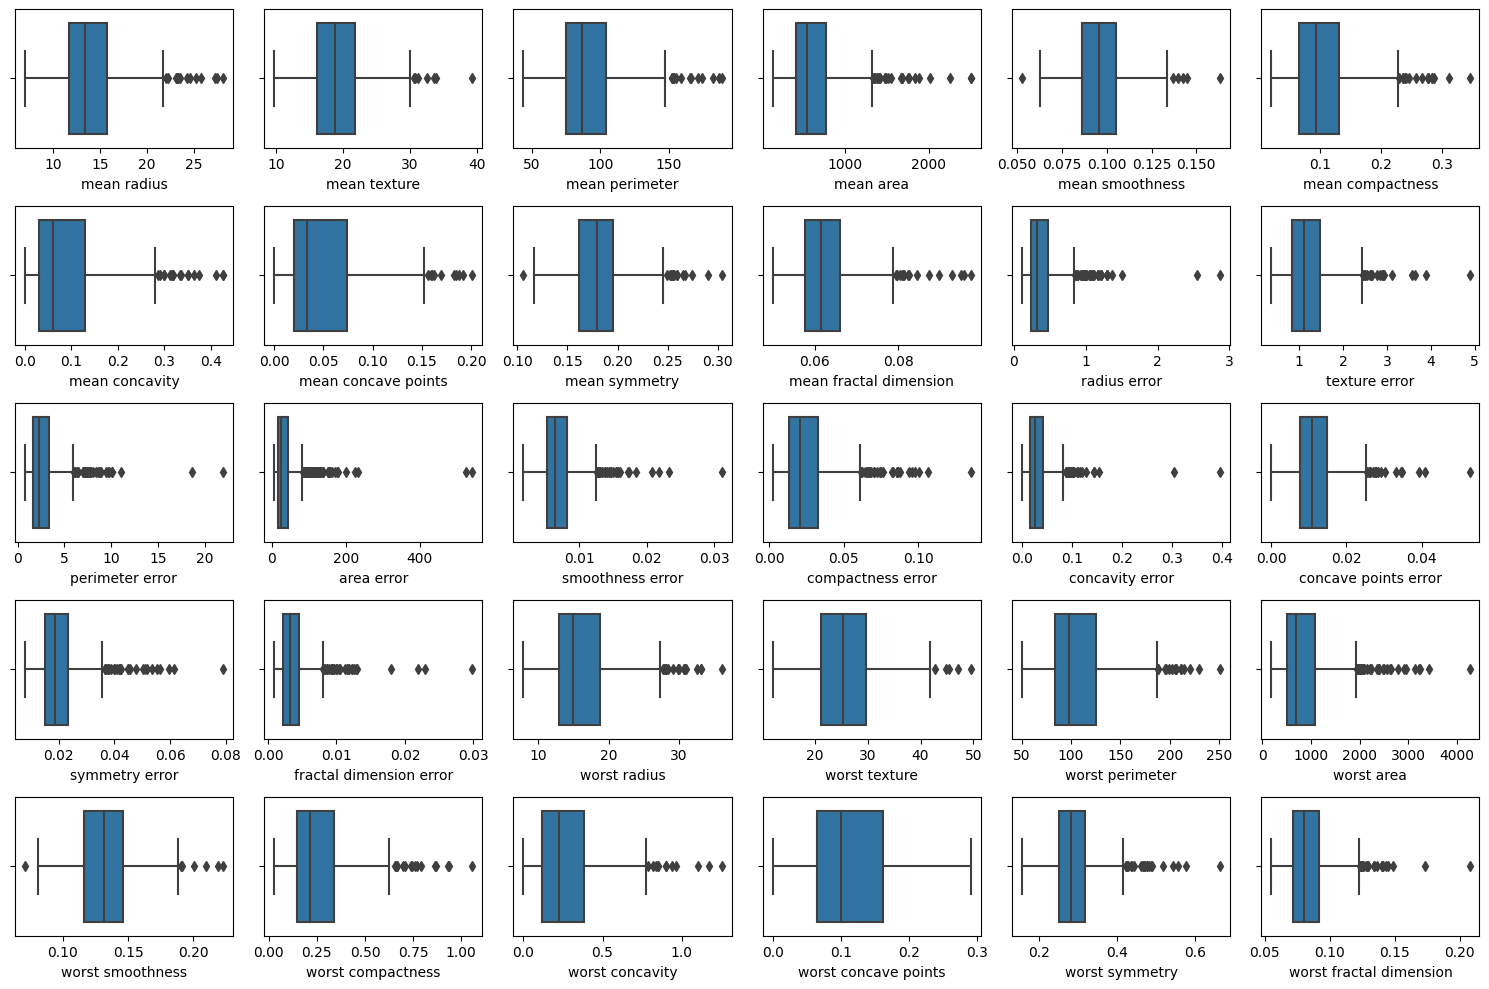

NameError: name 'histplots' is not defined

In [17]:
boxplots(df)
histplots(df, False)
histplots(df, True)

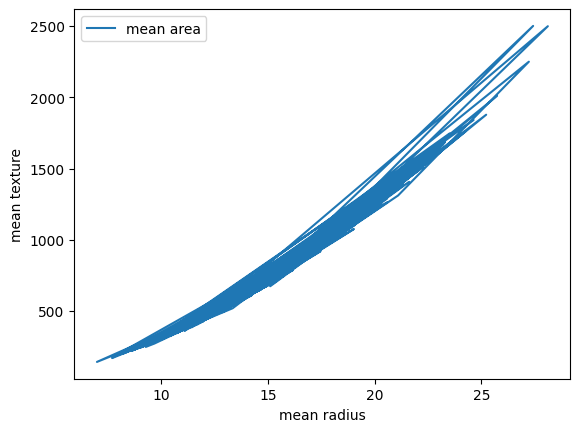

In [13]:
import matplotlib.pyplot as plt
# 데이터를 준비합니다.
# x_data는 x축에 해당하는 데이터입니다.
# y_data는 y축에 해당하는 데이터입니다.
# data는 데이터프레임이나 시리즈 객체입니다.

# 선 그래프를 그립니다.
df.plot(x='mean radius', y = 'mean area')

# 축 레이블을 설정합니다.
plt.xlabel('mean radius')
plt.ylabel('mean texture')

# 그래프를 표시합니다.
plt.show()


In [14]:
# 데이터프레임의 각 열 사이의 상관관계 표현
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


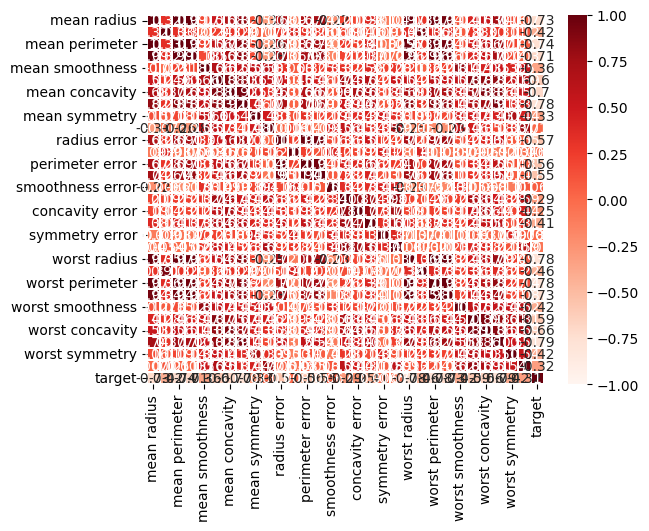

In [15]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')
plt.show()


## Step 3. 모델 학습


### 문제 6. Logistic Regression(로지스틱 회귀)

- 유방암 데이터셋 불러오기
- train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
- predict() 사용하여 샘플 5개 예측해보기
- predict_proba()를 이용하여 위 샘플 5개의 예측 확률 출력해보기 
- lr.coet_, lr.intercept_ 사용하여 로지스틱 회귀가 학습한 계수 확인하기 
- 시그모이드 or 소프트맥스 중 어느 모델을 사용할 시 생각한 후 해당모델로 확률 값 구하기
- predict_proba() 의 확률값과 비교해 보기 
- 로지스틱 회귀분석에 대한 결과 해석 하기

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
print(pd.unique(df['target']))

[0 1]


In [9]:
# 유방암 데이터 불러오기

data = load_breast_cancer()

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
                                    data.data, data.target, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 로지스틱 회귀 모델 학습하기
lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(data.data, data.target))
print(lr.score(test_input,test_target))

0.9472759226713533
0.9649122807017544


predict() 사용하여 샘플 5개 예측

In [12]:
# 악성(malignant) target 값 = 0
#양성(benign) target 값 = 1

print(lr.predict(test_scaled[:5]))

[0 1 1 0 0]


2, 3 번째 샘플을 양성 으로 예측

In [13]:
#lr.predict_proba 확률값 구하고 predict 결과와 비교

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)

[[0.648 0.352]
 [0.033 0.967]
 [0.479 0.521]
 [0.652 0.348]
 [0.551 0.449]]
[0 1]


첫번 째 열이 악성클래스(0) 확률 두번 쨰 열이 양성클래스(1) 확률

In [28]:
# 로지스틱 회귀 모델이 학습한 계수
print(lr.coef_, lr.intercept_)

[[ 1.07091537  0.50488671  0.19490279 -0.01502173 -0.03984483 -0.19240573
  -0.2659547  -0.11344981 -0.05946847 -0.01200052  0.03692648  0.44436333
   0.03167432 -0.10088735 -0.00371311 -0.03987899 -0.05482588 -0.01463172
  -0.01402011 -0.00349539  1.12796073 -0.56097199 -0.20319854 -0.01485672
  -0.07119485 -0.5832909  -0.72094293 -0.21039851 -0.19211424 -0.05394053]] [0.20192908]


### 문제 6-1.SGDClassifier

- 유방암 데이터셋 불러오기
- train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
- max_iter 설정
- partial_fit() 메서드 호출하고 훈련세트, 테스트세트 점수 확인해보기
- 에포크를 설정하여 훈련세트, 테스트 세트 점수 그래프 그려보기


In [29]:
# 훈련세트와 세트스 세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 클래스 임포트
from sklearn.linear_model import SGDClassifier

In [31]:
#loss='log' : 로지스틱 손실함수 지정, max_iter: 수행 할 에포크 횟수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9758241758241758
0.9736842105263158


훈련세트, 테스트 세트 점수 그래프 

In [15]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)


In [16]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

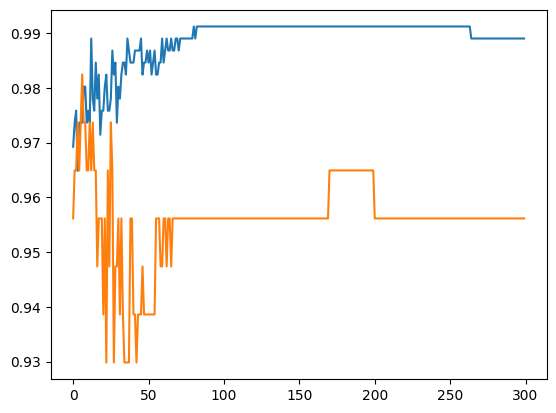

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

훈련세트 그래프가 테스트 세트 그래프에 비해 점수가 낮다

In [35]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [36]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.978021978021978
0.956140350877193


### 문제 7. 의사결정나무

- 유방암 데이터셋 불러오기
- train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
- 결정트리 모델 만들기
- 훈련세트, 테스트세트 점수비교
- 가지치기 후 가지치기 전의 훈련세트, 테스트세트와 점수비교 해보기 
- feature_importances_ 사용하여 특성 중요도 출력해보기
- 위 로지스틱 회귀분석에 대한 결과와 비교하여 해석 해보기

In [37]:
# 결정트리 모델 만들기 및 점수 비교
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) #훈련세트
print(dt.score(test_scaled, test_target)) #x테스트 세트

1.0
0.9473684210526315


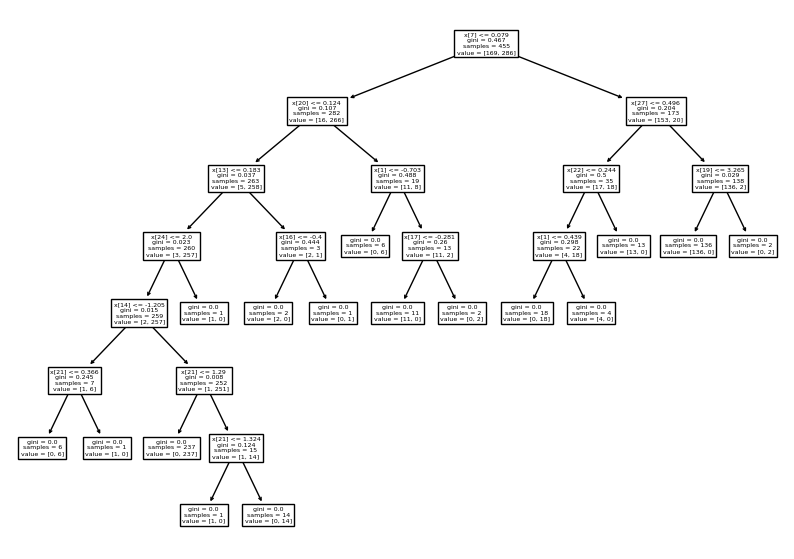

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

가지치기 후 점수 비교

In [39]:
# max_depth=3 루트 노드 아래로 최대 3개의 노드까지 성장
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.978021978021978
0.9473684210526315


feature_importances_ 사용하여 특성 중요도 출력해보기

In [40]:
print(dt.feature_importances_)

[0.         0.03010577 0.         0.         0.         0.
 0.         0.75230354 0.         0.         0.         0.
 0.         0.01303772 0.         0.         0.         0.
 0.         0.02018831 0.05690456 0.         0.05602834 0.
 0.         0.         0.         0.07143177 0.         0.        ]


### 문제 8. 교차검증

- 유방암 데이터셋 불러오기
- train_test_split() 함수로 훈련세트, 검증세트, 테스트세트 분리하기
- cross_validate() 함수 사용하여 교차검증 시행 후 test_score 구하기 

In [60]:
# cross_validate() 함수 사용하여 교차검증 시행 후 test_score 구하기
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01382875, 0.01148653, 0.01168108, 0.00806093, 0.01629567]), 'score_time': array([0.00116754, 0.        , 0.00809097, 0.        , 0.        ]), 'test_score': array([0.92307692, 0.89010989, 0.96703297, 0.9010989 , 0.92307692])}


- 'fit_time': 모델 훈련에 소요된 시간을 나타내는 배열입니다. 다섯 번의 교차 검증 시행마다 소요된 시간이 기록되어 있습니다.
- 'score_time': 모델의 예측 및 평가에 소요된 시간을 나타내는 배열입니다. 위의 결과에서는 대부분의 시간이 0으로 나타나므로, 예측 및 평가에는 매우 적은 시간이 소요되었음을 의미합니다.
- 'test_score': 교차 검증에서 얻은 각 폴드의 테스트 점수를 나타내는 배열입니다. 다섯 번의 교차 검증 시행마다 얻은 점수가 기록되어 있습니다. 이 점수들은 해당 폴드에서 모델의 성능을 나타내는 값으로, 값이 클수록 좋은 성능을 나타냅니다.

위의 결과를 종합해보면, 다섯 번의 교차 검증을 수행한 결과 모델의 평균 테스트 점수는 약 0.93 정도로 나타났습니다. 이는 모델이 상당히 좋은 성능을 보이는 것으로 해석할 수 있습니다. 또한, 모델 훈련 및 예측에 소요된 시간도 상당히 적은 편이므로 비교적 효율적으로 모델을 구축할 수 있었음을 알 수 있습니다.

점수 평균

In [42]:
import numpy as np

print(np.mean(scores['test_score']))

0.9318681318681319


### 문제 8-1. 하이퍼파라미터 튜닝

- 그리드서치 GridSearchCV 사용하여 하이퍼파라미터 탐색과 교차 검증을 한번에 수행하기
- 최적의 매개변수를 찾고, 최상의 매개변수 조합 확인하기
- max_depth, min_impurity_decrease, min_samples_split

그리드서치 GridSearchCV 사용하여 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

In [50]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
 'max_depth': range(5, 20, 1),
 'min_samples_split': range(2, 100, 10)}


In [51]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [52]:
print(gs.best_params_)

{'max_depth': 7, 'min_impurity_decrease': 0.0005, 'min_samples_split': 12}


In [56]:
#                        실수값   정수값 출력
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

#유방암 데이터 셋 불러오기
data = load_breast_cancer()
train_input = data.data
train_target = data.target

# 훈련세트 검증 세트, 테스트 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
                                    data.data, data.target, test_size=0.2, random_state=42)

#결정 트리 생성
dt = DecisionTreeClassifier()

# 매개변수 설정
param_grid = {
 'max_depth': [3, 4, 5],
 'min_impurity_decrease': [0.0, 0.1, 0.2],
 'min_samples_split': [2, 5, 10]
}

# 그리드서치 객체 생성
grid_search = GridSearchCV(dt, param_grid, cv=5)

# 그리드서치 수행
grid_search.fit(train_input, train_target )

# 최적의 매개변수와 최상의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
Best Score: 0.9362637362637363


- 랜덤서치 사용하여 위 그리드서치값과 비교해 보기 

In [59]:
#결정 트리 생성
dt = DecisionTreeClassifier()

# 매개변수 설정
param_dist = {
 'max_depth': [3, 6],
 'min_impurity_decrease': [0.0, 0.1, 0.2],
 'min_samples_split': [2, 11]
}

# 랜덤서치 객체 생성
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5)

# 랜덤서치 수행
random_search.fit(train_input, train_target)

# 최적의 매개변수와 최상의 매개변수 조합 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'min_samples_split': 11, 'min_impurity_decrease': 0.0, 'max_depth': 3}
Best Score: 0.9318681318681319


그리드 서치는 가능한 모든 조합을 탐색하여 최적의 조합을 찾는 반면,
랜덤 서치는 무작위로 매개변수를 선택하여 탐색하는 방법이다.  

그리드 서치의 Best Score: 0.9362637362637363  
랜덤 서치의 Best Score: 0.9318681318681319  

두 방법을 비교하면, 그리드 서치의 최고 점수가 랜덤 서치의 최고 점수보다 약간 더 높습니다. 이는 그리드 서치가 가능한 모든 조합을 탐색하기 때문에 더 정확한 최적값에 근접할 가능성이 높다는 것을 의미합니다.

하지만 랜덤 서치의 최고 점수도 그리드 서치와 비교할만한 성능을 보여줍니다. 랜덤 서치는 무작위로 매개변수를 선택하기 때문에 최적해를 보장하지 않지만, 많은 반복을 통해 근사적인 최적값에 도달할 수 있습니다.

따라서, 계산 비용과 시간을 고려할 때, 랜덤 서치가 더 효율적일 수 있습니다. 그리드 서치는 모든 조합을 탐색하기 때문에 계산 비용이 많이 들고, 큰 매개변수 공간에서는 사용하기 어려울 수 있습니다.

따라서, 랜덤 서치를 사용하여 매개변수 탐색을 진행하면서도 높은 성능을 얻을 수 있습니다. 그리드 서치와 비교하여 최고 점수의 차이가 크지 않기 때문에 랜덤 서치가 더 효율적인 선택일 수 있습니다.

### 문제 9. 랜덤 포레스트

- 유방암 데이터셋 불러오기
- 랜덤포레스트 모델 학습하기
- 부트스트랩 샘플에 포함되지 않고 남는 샘플 = oob (out of bag) 이용하여 결정 트리 평균 출력하기
- 랜덤포레스트와 결과 값 비교해보기 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

#유방암 데이터 셋 불러오기
data = load_breast_cancer()
train_input = data.data
train_target = data.target

# 훈련세트 검증 세트, 테스트 세트 분리
train_input, test_input, train_target, test_target = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

#랜덤 포레스트 모델 생성
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

# 결과값 출력
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

                                    

1.0 0.9582417582417582


OOB sample
* 부트스트랩 샘플에 포함되지 않고 남는 샘플을 이용하여 훈련한 결정트리를 평가
* oob_score=True 로 지정해야함(기본 값은 False)

In [68]:
#OOB 점수 출력

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9560439560439561


첫 번째로, cross_validate 함수를 사용하여 교차 검증을 수행한 결과는 1.0과 0.9582417582417582로 출력되었습니다. 여기서 1.0은 훈련 데이터에 대한 평균 정확도를 나타내고, 0.9582417582417582는 검증 데이터에 대한 평균 정확도를 나타냅니다. 이는 랜덤 포레스트 모델이 훈련 데이터에 대해서는 100%의 정확도를 달성하였으며, 검증 데이터에 대해서는 약 95.8%의 정확도를 보였다는 의미입니다.  

두 번째로, rf.oob_score_를 출력한 결과는 0.9560439560439561입니다. 이는 OOB(out-of-bag) 샘플을 사용하여 모델을 훈련시킨 후의 정확도를 나타냅니다. OOB 평가는 부트스트랩 샘플링과 OOB 샘플을 사용하여 모델을 평가하는 방법입니다. 따라서, 0.9560439560439561은 OOB 평가를 통해 얻은 예측 정확도로 해석할 수 있습니다.  

세 번째로, 두 가지 방식으로 모델을 평가한 결과를 비교하면, 교차 검증과 OOB 평가의 결과가 유사함을 알 수 있습니다. 두 방법 모두 약 95%의 예측 정확도를 보여주고 있으며, 모델이 훈련 데이터와 검증 데이터 모두에서 일정한 예측 성능을 보이고 있다는 것을 나타냅니다.  

따라서, 이러한 결과는 랜덤 포레스트 모델이 훈련 데이터에 대해서는 높은 정확도로 예측을 수행하며, 검증 데이터와 OOB 샘플을 사용한 평가에서도 일정 수준의 예측 성능을 보여준다는 것을 나타냅니다. 이는 모델이 훈련 데이터에서 학습한 패턴을 일반화하여 새로운 데이터에 대해 유용한 예측을 수행할 수 있다는 것을 시사합니다.






In [67]:
# 결정 중요도 출력

rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


### 문제 10. GradientBoostingClassifier (그레이디언트 부스팅)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
import numpy as np

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 0.9516483516483516


In [26]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
random_state=42)
scores = cross_validate(gb, train_input, train_target,
return_train_score=True, n_jobs=-1)
print(scores['train_score'], np.mean(scores['test_score']))

[1. 1. 1. 1. 1.] 0.9582417582417582


### 문제 11. XGBoost 

In [27]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import numpy as np

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 0.9626373626373628


### 문제 12. LightGBM

In [31]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.964835164835165


### 문제 13. 총평 작성하기 